## Feature extraction from infrared sky images for solar energy estimation

In recent years the idea of a transition to renewable energy sources has progressively gained more strength. Within this movement, solar energy is classified as one of the most important, being a clean alternative to traditional electricity generation systems.

To maximize solar energy production, it is important to have information on atmospheric conditions, especially incident solar radiation. Satellite images have been used to study atmospheric features such as cloud cover and solar radiation estimates. In this field, sky cameras have emerged as a promising technology to study sky conditions with greater precision. These cameras offer a view of the sky with high spatial resolution. Combining satellite images and sky cameras has proven effective in predicting the presence of clouds in the short term. [1] This information is key to adapt the operation of solar power plants to meteorological conditions and achieve better integration of the electricity generated into the grid. 

The objective of this work is to extract features from images gathered with an infrared sky cam on panoramic sky images, for intra-hour solar estiamtion. To achieve this several techniques from image analysis and vision image will be implemented into a single pipeline to obtain the relevant data for further use as inputs in solar prediction models. 

### Image preprocessing 

For this specific work the images received were formated as .jp2 files, to handle this type of files the `imageio` library was used. The file type that is loaded is of type `Uint16`.

uint16


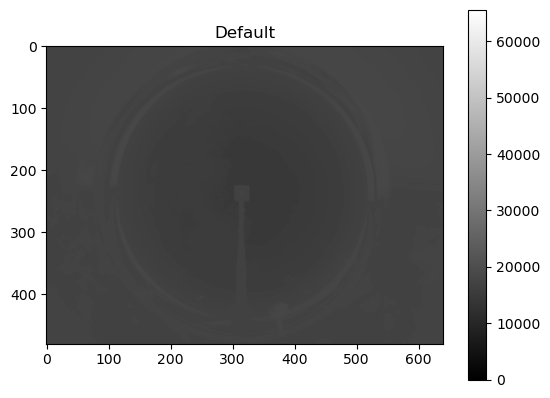

In [127]:
import imageio.v2 as imageio
from PIL import Image
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt

# path to jp2 image
filepath = '20230807/20230807152030.jp2'

# Read the JP2 image
image = imageio.imread(filepath)
print(image.dtype)
# Showing image in default range
plt.imshow(image.astype(int), cmap="gray", vmin=0, vmax=2**16-1)
plt.title("Default")
plt.colorbar()


Matplotlib by default makes a normalization process when displaying images, by linearly mapping the minimun and maximum values of the image to the `[0.0, 1.0]` interval. To view the image in better detail a color mapping can be applied. In the following example `jet` mapping is applied. Note that the image values in the `img` variable remain unchanged, however the image shown is in the range of `[14537, 18358]`, corresponding to the min and max values of the given image.

14537
18358


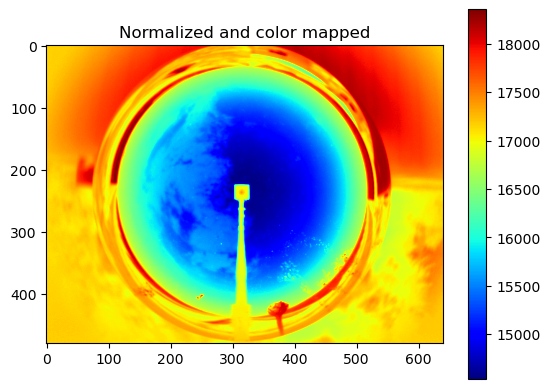

In [128]:
print(np.min(image))
print(np.max(image))
plt.imshow(image.astype(int), cmap="jet")
plt.title("Normalized and color mapped")
plt.colorbar()

`Uint16` is sometimes not the best way to work with image data, for ease of use in the following sections the img variable can be converted to `int32` instead.

In [129]:
# Image gets converted to int32
int_img = image.astype(int)
print(int_img.dtype)

int32


### Image segmentation

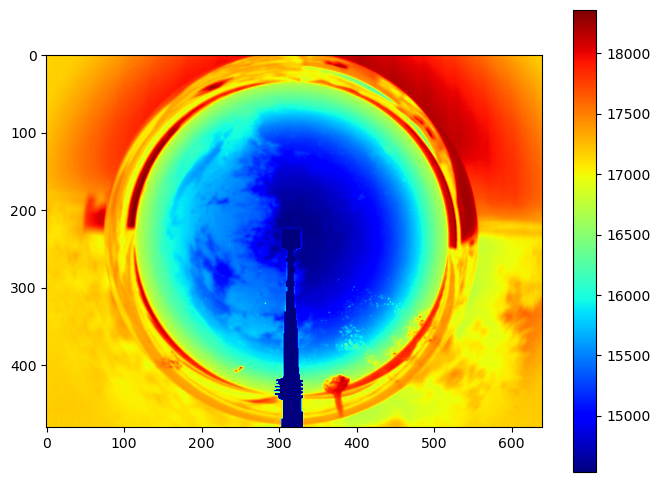

In [130]:
# # A previously made mask for the camera is multiplied to the image to make it the darkest part of it by -1
camara = Image.open('camara_2.png')
camara = np.asarray(camara)
# Only the alpha channel is needed, and is divided by 255 to get the number in the range [0,1]
slicee = camara[:,:,3]/255
img = int_img * slicee
img[img<1000] = np.max(np.min(int_img) - 1, 0)

plt.figure(figsize=(8,6))
plt.imshow(img, cmap="jet")
plt.colorbar()
